In [33]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 1. 기존의 프로그램 방식

- 회귀분석(linear regression) 설명 사이트 : https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균)  
-
https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62

![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)

- 경사하강법 설명
    - https://www.mql5.com/ko/articles/11200
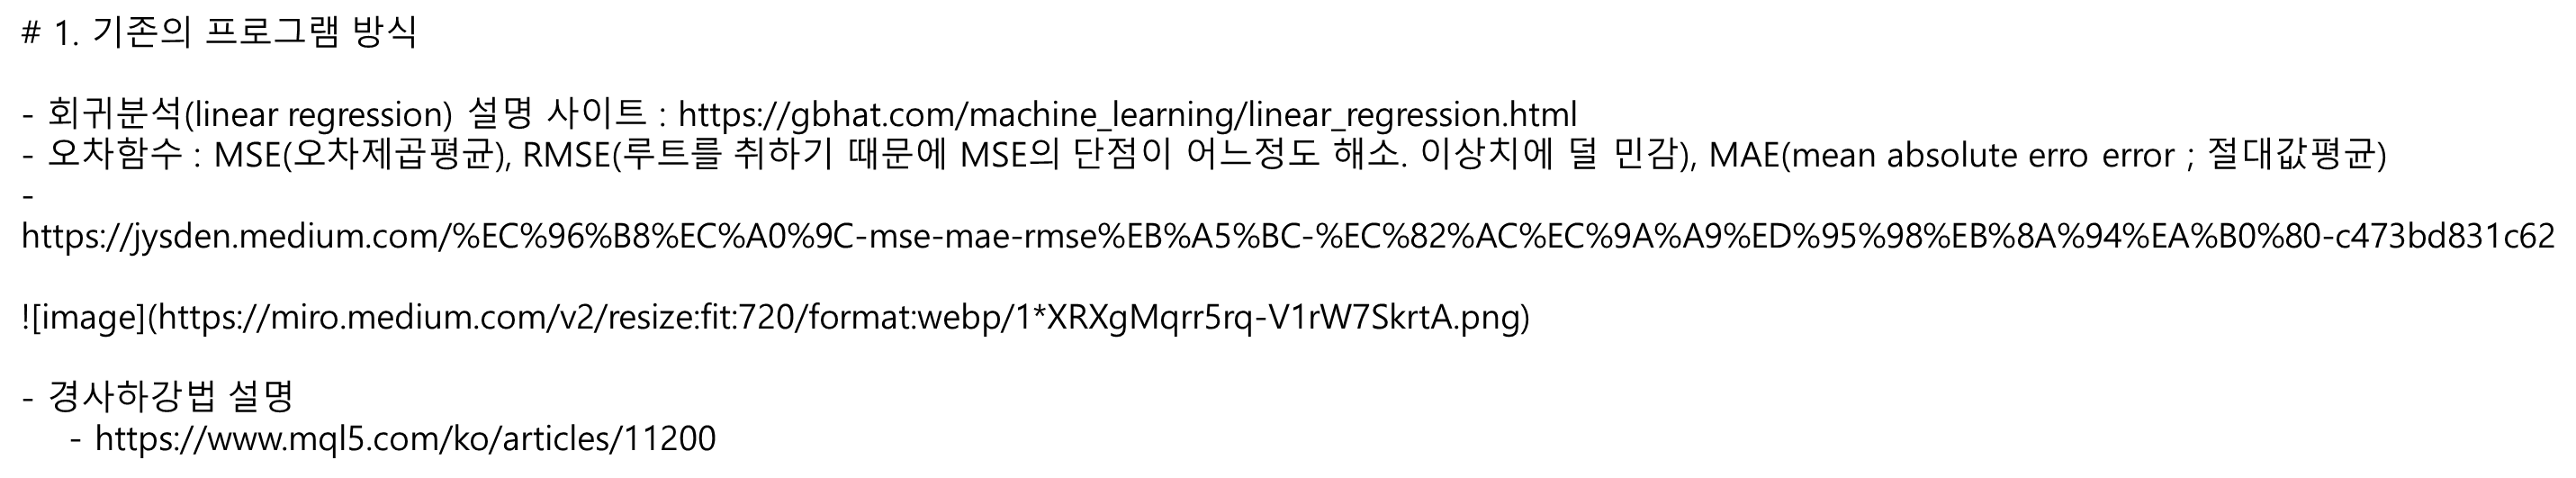

In [2]:
# 섭씨온도를 화씨온도를 출력
def celsius_to_faherenheit(c):
    return c * 1.8 + 32

In [3]:
input_c = int(input('섭씨온도 ?'))
print('화씨온도는', celsius_to_faherenheit(input_c))

섭씨온도 ?0
화씨온도는 32.0


# 2. 머신러닝 프로그램 방식
```
1. 데이터 확보 및 생성
2. 데이터 전처리 : 
    스케일 조정
    훈련데이터(학습데이터셋), 검증데이터셋, 시험데이터셋로 분할
3. 모델구성
4. 모델 학습과정 설정
5. 모델 학습시키기
6. 모델 평가(시험데이터셋으로)
7. 모델 저장 및 사용(입력값이 주어지면 예측값 받기)
```
## 2.1 노이즈가 없는 데이터로 실습

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 1. 데이터 생성
data_C = np.arange(100) # 0부터 99까지
data_C # 독립변수(입력변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
data_F = celsius_to_faherenheit(data_C)
data_F # 종속변수(타겟변수, 출력변수)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [7]:
# 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해 스케일 조정
scaled_data_C = data_C / 100.0
scaled_data_F = data_F / 100.0
print('학습시 독립변수 :', scaled_data_C)
print('학습시 타겟변수 :', scaled_data_F)

학습시 독립변수 : [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
학습시 타겟변수 : [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1

In [8]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[]

In [9]:
# 3. 모델 구성
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input # 입력값과 출력값으로 layer층 지정

model = Sequential()
# model.add(Input(shape=(1,) ))
# model.add(Dense(1))
model.add(Dense(units=1, # 타겟(종속) 변수의 갯수
                input_shape=(1,))) #입력(독립)변수의 shape

In [10]:
# 4. 모델 학습과정 설정
model.compile(loss="mse", # 손실함수 - 모델 학습 중 오차를 최소화하기 위해 사용
             optimizer="rmsprop", # 옵티마이저
             metrics=['mae']) #평가지표
# mse : 오차 제곱의 평균
# mae : 오차 절대값의 평균(이상치 영향이 감소)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 학습전 예측
model.predict(np.array([[0],
                       [0.01]])) # 섭씨온도 0, 1도는 화씨온도 몇도?

1/1 [==============================] - 0s 63ms/step


array([[0.        ],
       [0.00359784]], dtype=float32)

In [12]:
# 학습전 모델 저장
model.save('model/before_learning.h5')

In [13]:
# 5. 모델 학습시키기 - 1번만 실행
hist = model.fit(scaled_data_C, # 입력변수(훈련데이터)
                scaled_data_F, # 타겟변수(훈련데이터)
                epochs=1000, # 학습횟수
                verbose=2) # 학습시 출력여부(0:학습내용출력X)

Epoch 1/1000
4/4 - 0s - loss: 1.2292 - mae: 1.0282 - 306ms/epoch - 76ms/step
Epoch 2/1000
4/4 - 0s - loss: 1.2039 - mae: 1.0168 - 5ms/epoch - 1ms/step
Epoch 3/1000
4/4 - 0s - loss: 1.1851 - mae: 1.0081 - 0s/epoch - 0s/step
Epoch 4/1000
4/4 - 0s - loss: 1.1713 - mae: 1.0017 - 11ms/epoch - 3ms/step
Epoch 5/1000
4/4 - 0s - loss: 1.1583 - mae: 0.9957 - 0s/epoch - 0s/step
Epoch 6/1000
4/4 - 0s - loss: 1.1445 - mae: 0.9892 - 16ms/epoch - 4ms/step
Epoch 7/1000
4/4 - 0s - loss: 1.1309 - mae: 0.9829 - 0s/epoch - 0s/step
Epoch 8/1000
4/4 - 0s - loss: 1.1176 - mae: 0.9765 - 17ms/epoch - 4ms/step
Epoch 9/1000
4/4 - 0s - loss: 1.1059 - mae: 0.9709 - 0s/epoch - 0s/step
Epoch 10/1000
4/4 - 0s - loss: 1.0943 - mae: 0.9654 - 17ms/epoch - 4ms/step
Epoch 11/1000
4/4 - 0s - loss: 1.0819 - mae: 0.9594 - 0s/epoch - 0s/step
Epoch 12/1000
4/4 - 0s - loss: 1.0698 - mae: 0.9536 - 0s/epoch - 0s/step
Epoch 13/1000
4/4 - 0s - loss: 1.0570 - mae: 0.9474 - 0s/epoch - 0s/step
Epoch 14/1000
4/4 - 0s - loss: 1.0452 - m

Epoch 112/1000
4/4 - 0s - loss: 0.2277 - mae: 0.3940 - 0s/epoch - 0s/step
Epoch 113/1000
4/4 - 0s - loss: 0.2235 - mae: 0.3900 - 16ms/epoch - 4ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.2190 - mae: 0.3858 - 0s/epoch - 0s/step
Epoch 115/1000
4/4 - 0s - loss: 0.2148 - mae: 0.3816 - 16ms/epoch - 4ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.2095 - mae: 0.3766 - 0s/epoch - 0s/step
Epoch 117/1000
4/4 - 0s - loss: 0.2047 - mae: 0.3719 - 0s/epoch - 0s/step
Epoch 118/1000
4/4 - 0s - loss: 0.2000 - mae: 0.3673 - 16ms/epoch - 4ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.1948 - mae: 0.3621 - 0s/epoch - 0s/step
Epoch 120/1000
4/4 - 0s - loss: 0.1908 - mae: 0.3581 - 0s/epoch - 0s/step
Epoch 121/1000
4/4 - 0s - loss: 0.1861 - mae: 0.3534 - 0s/epoch - 0s/step
Epoch 122/1000
4/4 - 0s - loss: 0.1821 - mae: 0.3494 - 0s/epoch - 0s/step
Epoch 123/1000
4/4 - 0s - loss: 0.1779 - mae: 0.3452 - 18ms/epoch - 5ms/step
Epoch 124/1000
4/4 - 0s - loss: 0.1741 - mae: 0.3413 - 4ms/epoch - 997us/step
Epoch 125/1000
4/4 - 0

Epoch 222/1000
4/4 - 0s - loss: 0.0325 - mae: 0.1556 - 0s/epoch - 0s/step
Epoch 223/1000
4/4 - 0s - loss: 0.0322 - mae: 0.1550 - 0s/epoch - 0s/step
Epoch 224/1000
4/4 - 0s - loss: 0.0320 - mae: 0.1542 - 17ms/epoch - 4ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0316 - mae: 0.1536 - 0s/epoch - 0s/step
Epoch 226/1000
4/4 - 0s - loss: 0.0314 - mae: 0.1528 - 0s/epoch - 0s/step
Epoch 227/1000
4/4 - 0s - loss: 0.0311 - mae: 0.1522 - 0s/epoch - 0s/step
Epoch 228/1000
4/4 - 0s - loss: 0.0307 - mae: 0.1514 - 0s/epoch - 0s/step
Epoch 229/1000
4/4 - 0s - loss: 0.0304 - mae: 0.1505 - 16ms/epoch - 4ms/step
Epoch 230/1000
4/4 - 0s - loss: 0.0301 - mae: 0.1498 - 0s/epoch - 0s/step
Epoch 231/1000
4/4 - 0s - loss: 0.0298 - mae: 0.1491 - 0s/epoch - 0s/step
Epoch 232/1000
4/4 - 0s - loss: 0.0294 - mae: 0.1483 - 17ms/epoch - 4ms/step
Epoch 233/1000
4/4 - 0s - loss: 0.0291 - mae: 0.1474 - 0s/epoch - 0s/step
Epoch 234/1000
4/4 - 0s - loss: 0.0287 - mae: 0.1464 - 0s/epoch - 0s/step
Epoch 235/1000
4/4 - 0s - los

Epoch 332/1000
4/4 - 0s - loss: 0.0063 - mae: 0.0683 - 0s/epoch - 0s/step
Epoch 333/1000
4/4 - 0s - loss: 0.0062 - mae: 0.0676 - 0s/epoch - 0s/step
Epoch 334/1000
4/4 - 0s - loss: 0.0060 - mae: 0.0667 - 17ms/epoch - 4ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.0059 - mae: 0.0662 - 0s/epoch - 0s/step
Epoch 336/1000
4/4 - 0s - loss: 0.0057 - mae: 0.0655 - 0s/epoch - 0s/step
Epoch 337/1000
4/4 - 0s - loss: 0.0056 - mae: 0.0646 - 0s/epoch - 0s/step
Epoch 338/1000
4/4 - 0s - loss: 0.0054 - mae: 0.0637 - 0s/epoch - 0s/step
Epoch 339/1000
4/4 - 0s - loss: 0.0053 - mae: 0.0628 - 16ms/epoch - 4ms/step
Epoch 340/1000
4/4 - 0s - loss: 0.0052 - mae: 0.0620 - 0s/epoch - 0s/step
Epoch 341/1000
4/4 - 0s - loss: 0.0050 - mae: 0.0612 - 0s/epoch - 0s/step
Epoch 342/1000
4/4 - 0s - loss: 0.0048 - mae: 0.0601 - 17ms/epoch - 4ms/step
Epoch 343/1000
4/4 - 0s - loss: 0.0047 - mae: 0.0593 - 0s/epoch - 0s/step
Epoch 344/1000
4/4 - 0s - loss: 0.0046 - mae: 0.0586 - 0s/epoch - 0s/step
Epoch 345/1000
4/4 - 0s - los

Epoch 438/1000
4/4 - 0s - loss: 8.3834e-07 - mae: 8.6225e-04 - 16ms/epoch - 4ms/step
Epoch 439/1000
4/4 - 0s - loss: 8.2685e-07 - mae: 8.6296e-04 - 0s/epoch - 0s/step
Epoch 440/1000
4/4 - 0s - loss: 2.6710e-08 - mae: 1.5387e-04 - 0s/epoch - 0s/step
Epoch 441/1000
4/4 - 0s - loss: 6.6905e-08 - mae: 2.3875e-04 - 17ms/epoch - 4ms/step
Epoch 442/1000
4/4 - 0s - loss: 1.2267e-06 - mae: 0.0010 - 0s/epoch - 0s/step
Epoch 443/1000
4/4 - 0s - loss: 3.2458e-07 - mae: 5.5027e-04 - 0s/epoch - 0s/step
Epoch 444/1000
4/4 - 0s - loss: 4.0848e-07 - mae: 6.2356e-04 - 0s/epoch - 0s/step
Epoch 445/1000
4/4 - 0s - loss: 8.0031e-07 - mae: 8.7684e-04 - 0s/epoch - 0s/step
Epoch 446/1000
4/4 - 0s - loss: 9.7616e-07 - mae: 9.2851e-04 - 16ms/epoch - 4ms/step
Epoch 447/1000
4/4 - 0s - loss: 9.2963e-08 - mae: 2.7258e-04 - 0s/epoch - 0s/step
Epoch 448/1000
4/4 - 0s - loss: 3.2085e-07 - mae: 5.3645e-04 - 0s/epoch - 0s/step
Epoch 449/1000
4/4 - 0s - loss: 9.3702e-07 - mae: 9.4288e-04 - 0s/epoch - 0s/step
Epoch 450/1

Epoch 538/1000
4/4 - 0s - loss: 2.1414e-07 - mae: 4.3861e-04 - 0s/epoch - 0s/step
Epoch 539/1000
4/4 - 0s - loss: 1.1373e-06 - mae: 0.0010 - 0s/epoch - 0s/step
Epoch 540/1000
4/4 - 0s - loss: 6.5246e-07 - mae: 7.6275e-04 - 0s/epoch - 0s/step
Epoch 541/1000
4/4 - 0s - loss: 2.8037e-07 - mae: 5.0239e-04 - 0s/epoch - 0s/step
Epoch 542/1000
4/4 - 0s - loss: 4.1570e-07 - mae: 6.2024e-04 - 16ms/epoch - 4ms/step
Epoch 543/1000
4/4 - 0s - loss: 6.5264e-07 - mae: 7.9222e-04 - 0s/epoch - 0s/step
Epoch 544/1000
4/4 - 0s - loss: 1.1921e-06 - mae: 0.0010 - 0s/epoch - 0s/step
Epoch 545/1000
4/4 - 0s - loss: 2.8231e-08 - mae: 1.6344e-04 - 1ms/epoch - 355us/step
Epoch 546/1000
4/4 - 0s - loss: 2.3811e-08 - mae: 1.4420e-04 - 0s/epoch - 0s/step
Epoch 547/1000
4/4 - 0s - loss: 1.0729e-06 - mae: 9.8599e-04 - 16ms/epoch - 4ms/step
Epoch 548/1000
4/4 - 0s - loss: 4.6626e-07 - mae: 6.6179e-04 - 0s/epoch - 0s/step
Epoch 549/1000
4/4 - 0s - loss: 2.7479e-07 - mae: 5.0910e-04 - 0s/epoch - 0s/step
Epoch 550/1000

Epoch 638/1000
4/4 - 0s - loss: 1.3756e-06 - mae: 0.0011 - 16ms/epoch - 4ms/step
Epoch 639/1000
4/4 - 0s - loss: 1.1096e-07 - mae: 3.1941e-04 - 0s/epoch - 0s/step
Epoch 640/1000
4/4 - 0s - loss: 6.2579e-09 - mae: 6.5891e-05 - 0s/epoch - 0s/step
Epoch 641/1000
4/4 - 0s - loss: 3.4922e-09 - mae: 4.7872e-05 - 16ms/epoch - 4ms/step
Epoch 642/1000
4/4 - 0s - loss: 1.0969e-06 - mae: 8.7175e-04 - 0s/epoch - 0s/step
Epoch 643/1000
4/4 - 0s - loss: 1.1538e-06 - mae: 9.4732e-04 - 0s/epoch - 0s/step
Epoch 644/1000
4/4 - 0s - loss: 1.5520e-08 - mae: 1.2183e-04 - 1ms/epoch - 322us/step
Epoch 645/1000
4/4 - 0s - loss: 3.0576e-08 - mae: 1.6634e-04 - 0s/epoch - 0s/step
Epoch 646/1000
4/4 - 0s - loss: 5.6882e-07 - mae: 6.7880e-04 - 16ms/epoch - 4ms/step
Epoch 647/1000
4/4 - 0s - loss: 1.2110e-06 - mae: 0.0011 - 0s/epoch - 0s/step
Epoch 648/1000
4/4 - 0s - loss: 3.6979e-07 - mae: 5.9336e-04 - 0s/epoch - 0s/step
Epoch 649/1000
4/4 - 0s - loss: 3.5398e-07 - mae: 5.8036e-04 - 17ms/epoch - 4ms/step
Epoch 65

4/4 - 0s - loss: 5.1530e-08 - mae: 2.1954e-04 - 0s/epoch - 0s/step
Epoch 738/1000
4/4 - 0s - loss: 7.0567e-07 - mae: 7.8642e-04 - 2ms/epoch - 409us/step
Epoch 739/1000
4/4 - 0s - loss: 1.2352e-06 - mae: 0.0010 - 0s/epoch - 0s/step
Epoch 740/1000
4/4 - 0s - loss: 7.2303e-08 - mae: 2.3742e-04 - 16ms/epoch - 4ms/step
Epoch 741/1000
4/4 - 0s - loss: 9.2067e-08 - mae: 2.7719e-04 - 0s/epoch - 0s/step
Epoch 742/1000
4/4 - 0s - loss: 1.3060e-06 - mae: 0.0011 - 0s/epoch - 0s/step
Epoch 743/1000
4/4 - 0s - loss: 4.4906e-07 - mae: 6.4705e-04 - 17ms/epoch - 4ms/step
Epoch 744/1000
4/4 - 0s - loss: 4.5794e-07 - mae: 6.5940e-04 - 0s/epoch - 0s/step
Epoch 745/1000
4/4 - 0s - loss: 5.6837e-07 - mae: 7.3717e-04 - 0s/epoch - 0s/step
Epoch 746/1000
4/4 - 0s - loss: 8.5906e-07 - mae: 8.9791e-04 - 0s/epoch - 0s/step
Epoch 747/1000
4/4 - 0s - loss: 5.8237e-07 - mae: 7.3905e-04 - 0s/epoch - 0s/step
Epoch 748/1000
4/4 - 0s - loss: 2.5273e-07 - mae: 4.9259e-04 - 16ms/epoch - 4ms/step
Epoch 749/1000
4/4 - 0s - 

Epoch 837/1000
4/4 - 0s - loss: 1.0624e-06 - mae: 9.7104e-04 - 0s/epoch - 0s/step
Epoch 838/1000
4/4 - 0s - loss: 7.0367e-07 - mae: 8.1078e-04 - 17ms/epoch - 4ms/step
Epoch 839/1000
4/4 - 0s - loss: 2.1342e-07 - mae: 4.5319e-04 - 0s/epoch - 0s/step
Epoch 840/1000
4/4 - 0s - loss: 3.9136e-07 - mae: 5.9284e-04 - 0s/epoch - 0s/step
Epoch 841/1000
4/4 - 0s - loss: 1.0740e-06 - mae: 0.0010 - 0s/epoch - 0s/step
Epoch 842/1000
4/4 - 0s - loss: 7.6979e-07 - mae: 8.3101e-04 - 0s/epoch - 0s/step
Epoch 843/1000
4/4 - 0s - loss: 9.3673e-08 - mae: 3.0084e-04 - 16ms/epoch - 4ms/step
Epoch 844/1000
4/4 - 0s - loss: 2.8772e-07 - mae: 5.0799e-04 - 0s/epoch - 0s/step
Epoch 845/1000
4/4 - 0s - loss: 1.3481e-06 - mae: 0.0011 - 0s/epoch - 0s/step
Epoch 846/1000
4/4 - 0s - loss: 1.2659e-07 - mae: 3.3894e-04 - 17ms/epoch - 4ms/step
Epoch 847/1000
4/4 - 0s - loss: 1.9677e-07 - mae: 4.2232e-04 - 0s/epoch - 0s/step
Epoch 848/1000
4/4 - 0s - loss: 1.7114e-06 - mae: 0.0013 - 16ms/epoch - 4ms/step
Epoch 849/1000
4

Epoch 937/1000
4/4 - 0s - loss: 4.8265e-07 - mae: 6.3815e-04 - 0s/epoch - 0s/step
Epoch 938/1000
4/4 - 0s - loss: 1.3702e-06 - mae: 0.0011 - 0s/epoch - 0s/step
Epoch 939/1000
4/4 - 0s - loss: 2.2251e-07 - mae: 4.6029e-04 - 0s/epoch - 0s/step
Epoch 940/1000
4/4 - 0s - loss: 5.0715e-08 - mae: 2.1945e-04 - 16ms/epoch - 4ms/step
Epoch 941/1000
4/4 - 0s - loss: 7.2847e-07 - mae: 7.9703e-04 - 0s/epoch - 0s/step
Epoch 942/1000
4/4 - 0s - loss: 1.6044e-06 - mae: 0.0011 - 0s/epoch - 0s/step
Epoch 943/1000
4/4 - 0s - loss: 1.2928e-08 - mae: 1.0778e-04 - 17ms/epoch - 4ms/step
Epoch 944/1000
4/4 - 0s - loss: 9.8006e-09 - mae: 9.5247e-05 - 0s/epoch - 0s/step
Epoch 945/1000
4/4 - 0s - loss: 1.3586e-07 - mae: 3.2302e-04 - 16ms/epoch - 4ms/step
Epoch 946/1000
4/4 - 0s - loss: 1.3460e-06 - mae: 0.0011 - 0s/epoch - 0s/step
Epoch 947/1000
4/4 - 0s - loss: 9.5049e-07 - mae: 9.2788e-04 - 0s/epoch - 0s/step
Epoch 948/1000
4/4 - 0s - loss: 5.5381e-08 - mae: 2.2744e-04 - 17ms/epoch - 4ms/step
Epoch 949/1000
4

In [14]:
# 6. 모델 평가(그래프를 통해 loss와 metrics값의 추이, 평가함수)
print(hist.history.keys())
print(hist.history['loss'][:5])
print(hist.history['mae'][:5])

dict_keys(['loss', 'mae'])
[1.229194164276123, 1.2038755416870117, 1.1851319074630737, 1.1713157892227173, 1.1583269834518433]
[1.0282349586486816, 1.0168094635009766, 1.0081428289413452, 1.0016862154006958, 0.9957221150398254]


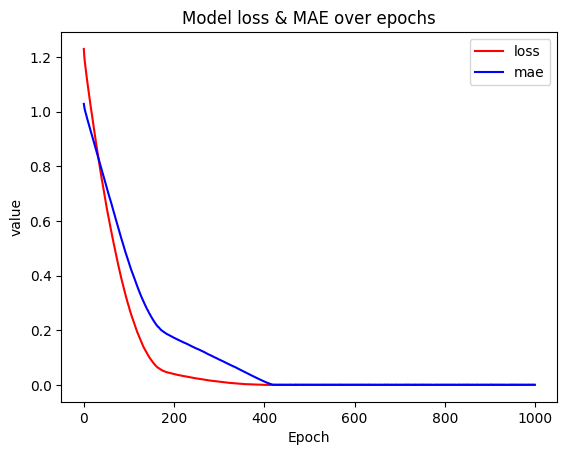

In [15]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend() # 범례 label 추가
plt.xlabel('Epoch')
plt.ylabel('value')
plt.title('Model loss & MAE over epochs')
plt.show()

In [16]:
# 7. 모델 저장 및 사용
# 학습 후 예측
model.predict(np.array([[0],
                       [0.01]])) # 섭씨온도 0, 1도는 화씨온도 몇도?

1/1 [==============================] - 0s 17ms/step


array([[0.31957513],
       [0.3375685 ]], dtype=float32)

In [17]:
model.save('model/after_learning.h5')

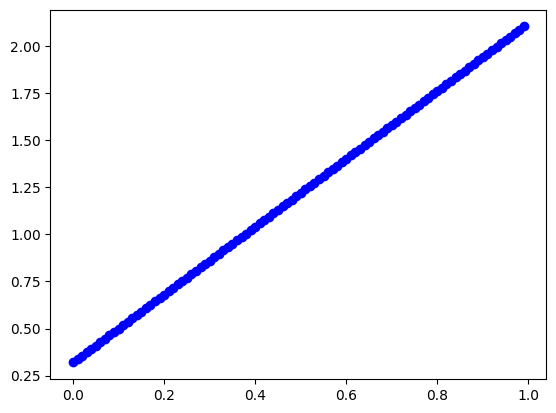

In [18]:
# 실제값
plt.scatter(x=scaled_data_C,
           y=scaled_data_F,
           c='b')
plt.show()

In [19]:
# 예측값
y_hat = model.predict([scaled_data_C])
for h, y in zip(y_hat, scaled_data_F):
    print('예측값:{}, 실제값:{}, 오차:{}'.format(h,
                                      y,
                                      h[0]-y))

4/4 [==============================] - 0s 3ms/step
예측값:[0.31957513], 실제값:0.32, 오차:-0.0004248690605163641
예측값:[0.3375685], 실제값:0.33799999999999997, 오차:-0.00043150830268856577
예측값:[0.35556182], 실제값:0.35600000000000004, 오차:-0.0004381773471832662
예측값:[0.37355518], 실제값:0.374, 오차:-0.00044481658935546786
예측값:[0.39154854], 실제값:0.392, 오차:-0.00045145583152772506
예측값:[0.4095419], 실제값:0.41, 오차:-0.00045809507369992675
예측값:[0.42753524], 실제값:0.428, 오차:-0.00046476411819457164
예측값:[0.4455286], 실제값:0.446, 오차:-0.00047140336036682884
예측값:[0.46352196], 실제값:0.46399999999999997, 오차:-0.0004780426025390305
예측값:[0.4815153], 실제값:0.48200000000000004, 오차:-0.00048471164703373093
예측값:[0.49950865], 실제값:0.5, 오차:-0.0004913508892059326
예측값:[0.517502], 실제값:0.518, 오차:-0.0004979901313781898
예측값:[0.53549534], 실제값:0.536, 오차:-0.0005046591758728347
예측값:[0.5534887], 실제값:0.554, 오차:-0.0005113282203674796
예측값:[0.57148206], 실제값:0.5720000000000001, 오차:-0.0005179376602173491
예측값:[0.5894754], 실제값:0.59, 오차:-0.000524606704711883
예측값:[0.

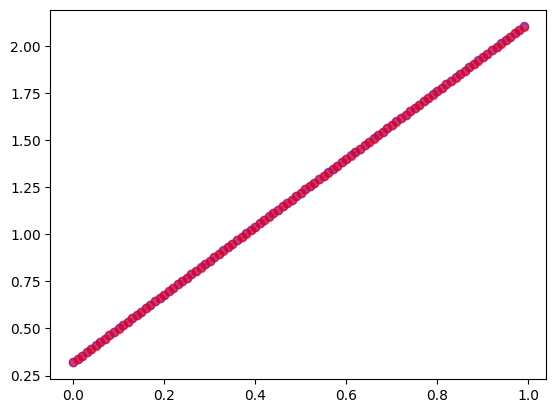

In [20]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b', alpha=0.5) # 투명한 점그래프
plt.scatter(x=scaled_data_C, y=y_hat, c='r', alpha=0.5)

## 2.2 노이즈가 있는 데이터로 실습

In [21]:
np.random.seed(7)
noise = np.random.normal(0, scale=0.1, size=100) # 평균0, 표준편차 0.1개 100개 데이터
noised_scaled_data_F = scaled_data_F + noise

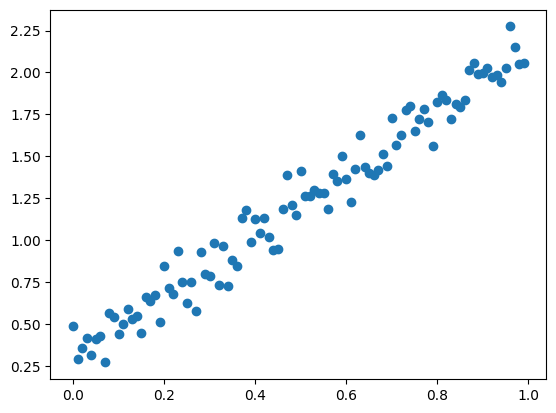

In [22]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F)
plt.show()

In [23]:
# 3. 모델구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 5. 모델 학습
hist2 = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.4639 - mae: 1.1093
Epoch 2/1000
4/4 [==============================] - 0s 353us/step - loss: 1.4377 - mae: 1.0984
Epoch 3/1000
4/4 [==============================] - 0s 0s/step - loss: 1.4177 - mae: 1.0900
Epoch 4/1000
4/4 [==============================] - 0s 584us/step - loss: 1.4006 - mae: 1.0827
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.3853 - mae: 1.0762
Epoch 6/1000
4/4 [==============================] - 0s 0s/step - loss: 1.3706 - mae: 1.0698
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.3561 - mae: 1.0636
Epoch 8/1000
4/4 [==============================] - 0s 0s/step - loss: 1.3412 - mae: 1.0571
Epoch 9/1000
4/4 [==============================] - 0s 492us/step - loss: 1.3277 - mae: 1.0511
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.3156 - mae: 1.0458
Epoch 11/1000
4/4 [==============================] - 0s 0s/step - 

4/4 [==============================] - 0s 241us/step - loss: 0.1048 - mae: 0.2737
Epoch 175/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1032 - mae: 0.2718
Epoch 176/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1012 - mae: 0.2692
Epoch 177/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0997 - mae: 0.2674
Epoch 178/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0982 - mae: 0.2654
Epoch 179/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0964 - mae: 0.2630
Epoch 180/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0948 - mae: 0.2611
Epoch 181/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0935 - mae: 0.2594
Epoch 182/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0924 - mae: 0.2581
Epoch 183/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0908 - mae: 0.2562
Epoch 184/1000
4/4 [==============================] - 0s 0s/step - loss

4/4 [==============================] - 0s 1ms/step - loss: 0.0257 - mae: 0.1328
Epoch 347/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0255 - mae: 0.1320
Epoch 348/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0253 - mae: 0.1314
Epoch 349/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0251 - mae: 0.1310
Epoch 350/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0248 - mae: 0.1305
Epoch 351/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0246 - mae: 0.1300
Epoch 352/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0244 - mae: 0.1294
Epoch 353/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0241 - mae: 0.1287
Epoch 354/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0240 - mae: 0.1283
Epoch 355/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0237 - mae: 0.1273
Epoch 356/1000
4/4 [==============================] - 0s 5ms/step - lo

4/4 [==============================] - 0s 0s/step - loss: 0.0108 - mae: 0.0817
Epoch 519/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0108 - mae: 0.0817
Epoch 520/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0108 - mae: 0.0813
Epoch 521/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0108 - mae: 0.0813
Epoch 522/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0107 - mae: 0.0813
Epoch 523/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0108 - mae: 0.0811
Epoch 524/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0107 - mae: 0.0811
Epoch 525/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0107 - mae: 0.0810
Epoch 526/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0107 - mae: 0.0810
Epoch 527/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0107 - mae: 0.0810
Epoch 528/1000
4/4 [==============================] - 0s 0s/step - los

4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0805
Epoch 691/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0103 - mae: 0.0805
Epoch 692/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0803
Epoch 693/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0103 - mae: 0.0804
Epoch 694/1000
4/4 [==============================] - 0s 923us/step - loss: 0.0103 - mae: 0.0805
Epoch 695/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0103 - mae: 0.0803
Epoch 696/1000
4/4 [==============================] - 0s 940us/step - loss: 0.0103 - mae: 0.0805
Epoch 697/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0103 - mae: 0.0803
Epoch 698/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0103 - mae: 0.0804
Epoch 699/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0103 - mae: 0.0807
Epoch 700/1000
4/4 [==============================] - 0s 5ms/step 

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 863/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0103 - mae: 0.0806
Epoch 864/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0805
Epoch 865/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0103 - mae: 0.0806
Epoch 866/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0103 - mae: 0.0806
Epoch 867/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0103 - mae: 0.0807
Epoch 868/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0103 - mae: 0.0806
Epoch 869/1000
4/4 [==============================] - 0s 254us/step - loss: 0.0103 - mae: 0.0808
Epoch 870/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0103 - mae: 0.0805
Epoch 871/1000
4/4 [==============================] - 0s 405us/step - loss: 0.0103 - mae: 0.0806
Epoch 872/1000
4/4 [==============================] - 0s 0s/step -

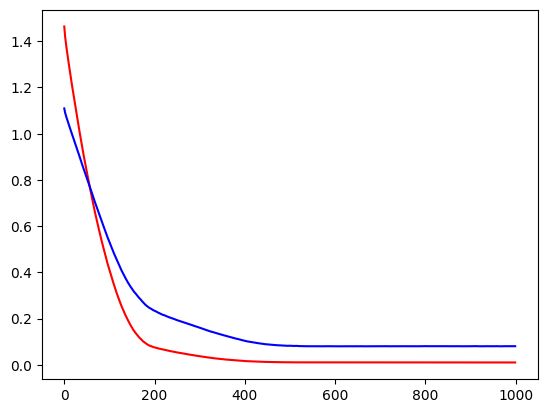

In [25]:
# 6. 학습된 모델 과정 살펴보기
plt.plot(hist2.history['loss'], c='r')
plt.plot(hist2.history['mae'], c='b')

In [31]:
model2.save('model/noise_after_learning.h5')

In [27]:
# 예측값
y_hat = model2.predict([scaled_data_C])

4/4 [==============================] - 0s 2ms/step


In [28]:
for h, y in zip(y_hat, noised_scaled_data_F):
    print("실제값:{}, 예측값:{}, 오차:{}".format(y,
                                        h,
                                        h[0]-y))

실제값:0.48905257038003563, 예측값:[0.3028604], 오차:-0.18619216135865807
실제값:0.2914062629459167, 예측값:[0.32123435], 오차:0.029828082490179486
실제값:0.3592820163678585, 예측값:[0.3396083], 오차:-0.019673704714721296
실제값:0.4147516282996508, 예측값:[0.35798225], 오차:-0.05676938023179495
실제값:0.31310769713742614, 예측값:[0.37635618], 오차:0.06324848734514832
실제값:0.4102065572905948, 예측값:[0.39473015], 오차:-0.01547640659097932
실제값:0.42791096141420687, 예측값:[0.4131041], 오차:-0.014806874299872763
실제값:0.2705275693654579, 예측값:[0.43147802], 오차:0.16095045416359482
실제값:0.5657658005663493, 예측값:[0.449852], 오차:-0.11591381082025554
실제값:0.542049851591955, 예측값:[0.46822596], 오차:-0.07382389562882019
실제값:0.43745710260332404, 예측값:[0.48659986], 오차:0.04914275997220696
실제값:0.5008451738804279, 예측값:[0.5049738], 오차:0.004128654912144092
실제값:0.5865299374196752, 예측값:[0.52334774], 오차:-0.06318220201470692
실제값:0.5278643584808353, 예측값:[0.5417217], 오차:0.013857343141173928
실제값:0.5477250921327455, 예측값:[0.56009567], 오차:0.012370575706304843
실제값:0.444675858

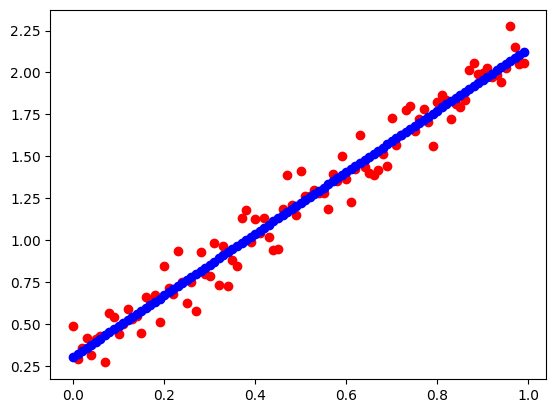

In [30]:
plt.scatter(x=scaled_data_C, 
            y=noised_scaled_data_F,
           c='r')
plt.scatter(x=scaled_data_C,
           y=y_hat,
           c='b')